## Final Project Submission

Please fill out:
* Student name: Cody Hoffman
* Student pace: part time
* Scheduled project review date/time: 8/6/20 4pm PST
* Instructor name: Eli Thomas
* Blog post URL:


### Table of Contents

* [Obtaining the data](#obtain)
    * [Tool import](#obtain1)
    * [Dataset import](#obtain2)
      
* [Scrubbing the data](#scrub)
    * [First look](#scrub1)
    * [Dropping Redundancy](#scrub2)
    * [Factorizing objects](#scrub3)
    * [Prioritizing relevant data](#scrub4)
    
* [Exploring the data](#explore)
    * [Waterpoints map](#explore1)
    * [Checking variance](#explore2)
    * [Features vs population](#explore3)

* [Modeling the data](#model)
    * [Logistic regression model](#model1)
    * [K-nearest neighbor](#model2)
    * [Decision tree classifier](#model3)
    * [AdaBoost classifier](#model4)
    * [Stochastic gradient descent](#model5)
    * [Naive Bayes](#model6)
    * [Testing and comparison](#model7)

* [Interpretation/Conclusion](#interp)

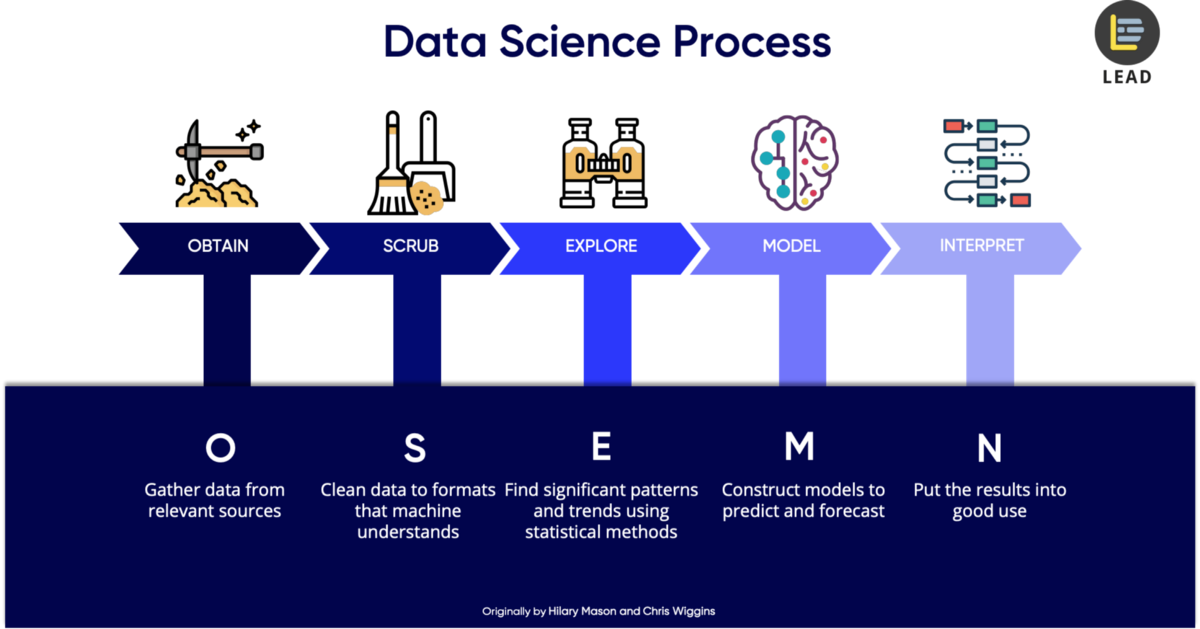

<a class="anchor" id="obtain"></a>
## Obtaining the data

#### The data for this project is supplied by http://taarifa.org/ as part of a competition hosted by https://www.drivendata.org/

<a class="anchor" id="obtain1"></a>
###### First the imports

In [1]:
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster, HeatMap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
import geopandas
from pylab import rcParams
import sklearn
from sklearn.model_selection import train_test_split
import warnings
from string import ascii_letters
warnings.filterwarnings('ignore')

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a class="anchor" id="obtain2"></a>
###### Importing the csv files and merging the training sets

In [2]:
dfTrain = pd.read_csv(r'C:\Users\Grimmethy\Downloads\Training Set Values.csv')
dfLabel = pd.read_csv(r'C:\Users\Grimmethy\Downloads\Training Set Labels.csv')
dfTest = pd.read_csv(r'C:\Users\Grimmethy\Downloads\Test Set Values.csv')

df = pd.merge(dfTrain, dfLabel, on='id',  how='left')
df2 = pd.merge(dfTest, dfLabel, on='id',  how='left')
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,NaN
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,NaN
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,NaN
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,NaN
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,NaN


<a class="anchor" id="scrub"></a>
## Scrubbing the Data

#### Machine learning requires that the data be numeric.
#### This data set has quite a few object type features.
<a class="anchor" id="scrub1"></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### We'll check the percentage of missing values for each feature for feature selection.

In [4]:
(df.isnull().sum()*100/ len(df)).sort_values(ascending=False)

scheme_name              47.417508
scheme_management         6.526936
installer                 6.153199
funder                    6.119529
public_meeting            5.612795
permit                    5.144781
subvillage                0.624579
ward                      0.000000
lga                       0.000000
district_code             0.000000
region_code               0.000000
region                    0.000000
num_private               0.000000
basin                     0.000000
wpt_name                  0.000000
latitude                  0.000000
longitude                 0.000000
gps_height                0.000000
date_recorded             0.000000
amount_tsh                0.000000
population                0.000000
status_group              0.000000
recorded_by               0.000000
water_quality             0.000000
waterpoint_type           0.000000
source_class              0.000000
source_type               0.000000
source                    0.000000
quantity_group      

<a class="anchor" id="scrub2"></a>
#### This dataset has quite a few redundant features. Let's drop a few shall we?

In [5]:
management = df[['management', 'management_group']]
quantity = df[['quantity', 'quantity_group']]
payment = df[['payment_type', 'payment']]
source = df[['source', 'source_type']]
quality = df[['water_quality', 'quality_group']]
extraction = df[['extraction_type', 'extraction_type_group', 'extraction_type_class', 'waterpoint_type', 'waterpoint_type_group']]

In [6]:
df.drop(['gps_height','management_group','id','wpt_name','num_private','region_code','quantity_group','payment_type',
        'district_code','lga','source_type','quality_group','extraction_type_group','extraction_type_class',
        'waterpoint_type_group','scheme_name','recorded_by'], axis=1, inplace=True)

<a class="anchor" id="scrub3"></a>
#### We'll factorize all object datatypes to obtain numerical representation.

In [7]:
df['funder'] = pd.factorize(df['funder'])[0]
df['installer'] = pd.factorize(df['installer'])[0]
df['extraction_type'] = pd.factorize(df['extraction_type'])[0]
df['management'] = pd.factorize(df['management'])[0]
df['payment'] = pd.factorize(df['payment'])[0]
df['water_quality'] = pd.factorize(df['water_quality'])[0]
df['quantity'] = pd.factorize(df['quantity'])[0]
df['status_group'] = pd.factorize(df['status_group'])[0]
df['basin'] = pd.factorize(df['basin'])[0]
df['region'] = pd.factorize(df['region'])[0]
df['source'] = pd.factorize(df['source'])[0]
df['source_class'] = pd.factorize(df['source_class'])[0]
df['waterpoint_type'] = pd.factorize(df['waterpoint_type'])[0]

<a class="anchor" id="scrub4"></a>
#### We'll further thin out the features by dropping some less relevant data.

In [8]:
df.drop(['scheme_management','public_meeting','permit','subvillage','ward'],
        axis=1,inplace=True)

#### There we have it. No more objects beyond datetime which I'll correct in exlpore.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   date_recorded      59400 non-null  object 
 2   funder             59400 non-null  int64  
 3   installer          59400 non-null  int64  
 4   longitude          59400 non-null  float64
 5   latitude           59400 non-null  float64
 6   basin              59400 non-null  int64  
 7   region             59400 non-null  int64  
 8   population         59400 non-null  int64  
 9   construction_year  59400 non-null  int64  
 10  extraction_type    59400 non-null  int64  
 11  management         59400 non-null  int64  
 12  payment            59400 non-null  int64  
 13  water_quality      59400 non-null  int64  
 14  quantity           59400 non-null  int64  
 15  source             59400 non-null  int64  
 16  source_class       594

<a class="anchor" id="explore"></a>
## Exploring the Data

#### We need to further explore the data in order to find the features with the highest impact on our target features.

<a class="anchor" id="explore1"></a>
#### Mapping the wells for visual context

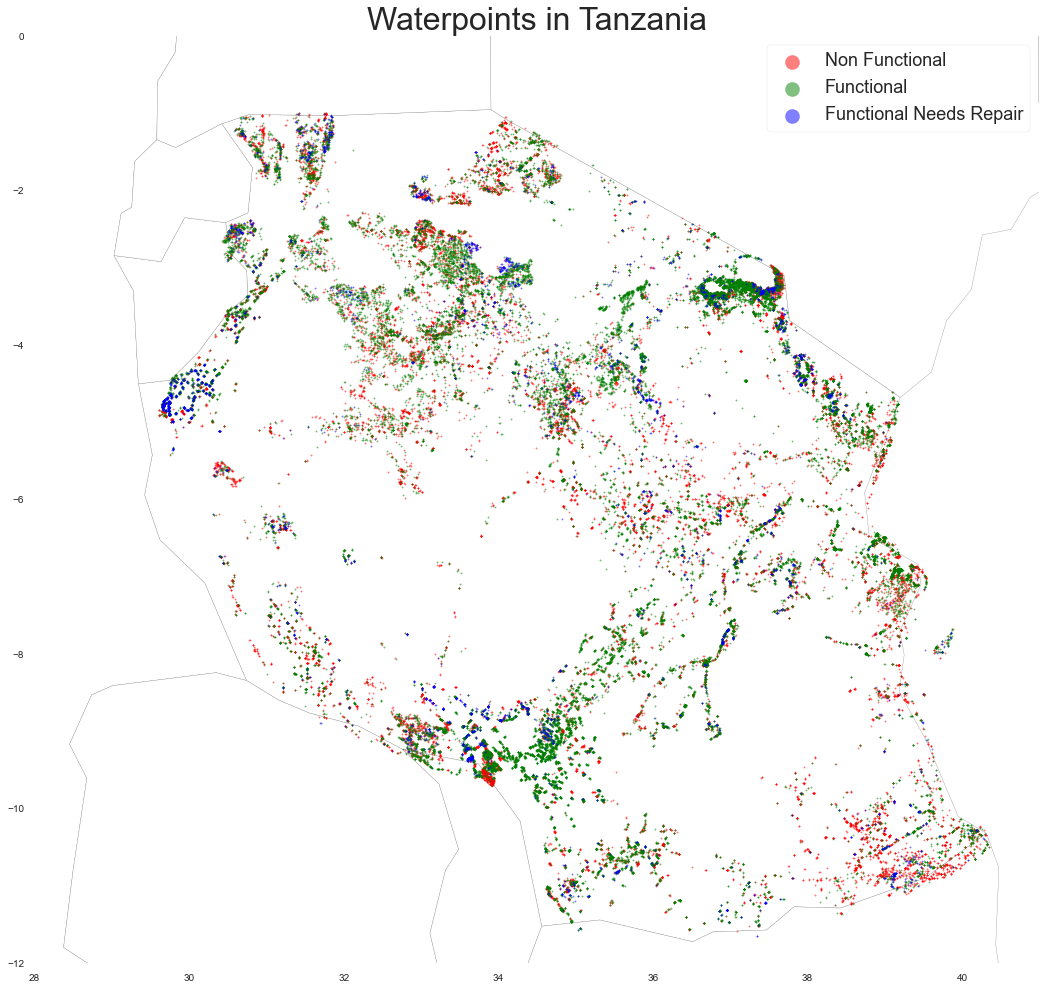

In [11]:
rcParams['figure.figsize'] = 18, 30

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

functional = gdf.where(gdf['status_group'] == 0)
repair = gdf.where(gdf['status_group'] == 2)
broken = gdf.where(gdf['status_group'] == 1)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='gray')

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=2, label='Non Functional')

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=2, label='Functional')

ax.scatter(repair['longitude'], repair['latitude'],
           c='blue', alpha=.5, s=2, label='Functional Needs Repair')

plt.ylim(-12, 0)
plt.xlim(28,41)

plt.legend(fontsize=18, markerscale=10)

plt.title('Waterpoints in Tanzania', fontsize=32)

plt.show()

<a class="anchor" id="explore2"></a>
#### We'll check the variance of each feature. Features that better explain the dataset tend to have higher variance.

In [12]:
df.describe()

,amount_tsh,funder,installer,longitude,latitude,basin,region,population,construction_year,extraction_type,management,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.00000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,130.773384,141.405909,34.077427,-5.706033e+00,3.641296,9.752340,179.909983,1300.652475,2.28468,1.178485,2.331902,0.294529,0.722677,3.237441,0.233737,1.077054,0.529596
std,2997.574558,245.733067,292.101115,6.567432,2.946019e+00,2.419185,6.045713,471.482176,951.620547,2.80128,2.256039,1.832529,0.901654,0.989555,2.424562,0.434129,1.162443,0.628080
min,0.000000,-1.000000,-1.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,5.000000,33.090347,-8.540621e+00,1.000000,5.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,39.000000,30.000000,34.908743,-5.021597e+00,4.000000,10.000000,25.000000,1986.000000,1.00000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,20.000000,128.000000,131.250000,37.178387,-3.326156e+00,6.000000,16.000000,215.000000,2004.000000,4.00000,1.000000,3.000000,0.000000,1.000000,5.000000,0.000000,2.000000,1.000000
max,350000.000000,1896.000000,2144.000000,40.345193,-2.000000e-08,8.000000,20.000000,30500.000000,2013.000000,17.00000,11.000000,6.000000,7.000000,4.000000,9.000000,2.000000,6.000000,2.000000


#### We'll check the distribution of each target class.

In [13]:
df['status_group'].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

#### We need to transform the date_recorded from an object to datetime. Then we'll use this info to find out how much time has passed since the wells construction from when it was last recorded.

In [14]:
df['date_recorded'] = pd.to_datetime(df.date_recorded)

In [15]:
year_recorded = df.date_recorded.dt.year.values
year_recorded.dtype

dtype('int64')

In [16]:
df['years_since_checked'] = year_recorded - pd.to_datetime(df['construction_year']).dt.year
df['years_since_checked'].value_counts()

41    28674
43    24271
42     6424
34       30
32        1
Name: years_since_checked, dtype: int64

In [17]:
df.drop(['date_recorded'],
        axis=1,inplace=True)

<a class="anchor" id="explore3"></a>
#### Comparing region vs. population split between the 3 classes

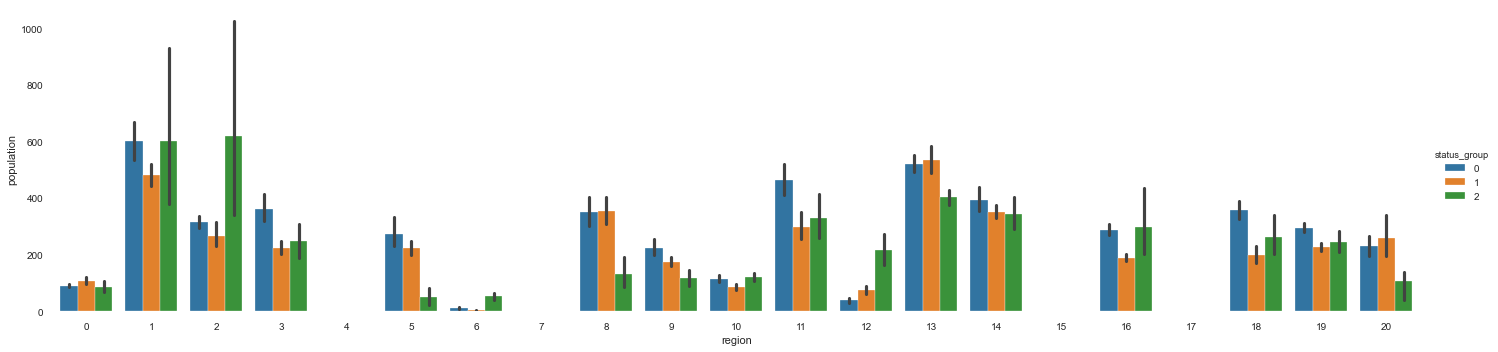

In [18]:
sns.catplot('region', 'population', data=df, hue='status_group', kind='bar', aspect=4)

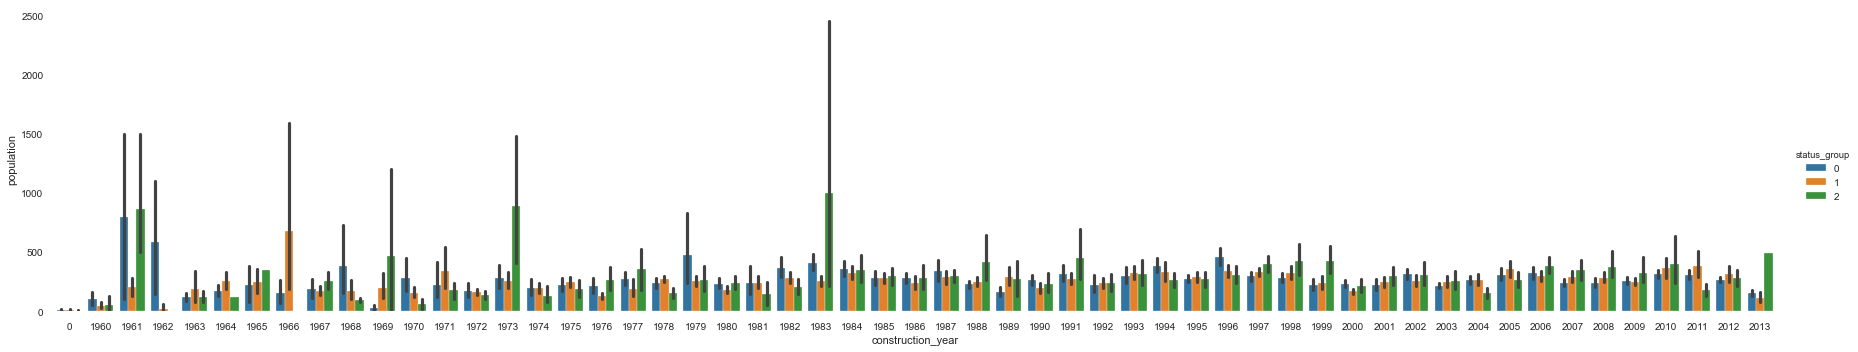

In [19]:
#Comparing construction_year vs. population split between the 3 classes
sns.catplot('construction_year', 'population', hue='status_group', data= df, kind='bar', aspect=5)

#### Comparing extraction_type vs. population split between the 3 classes


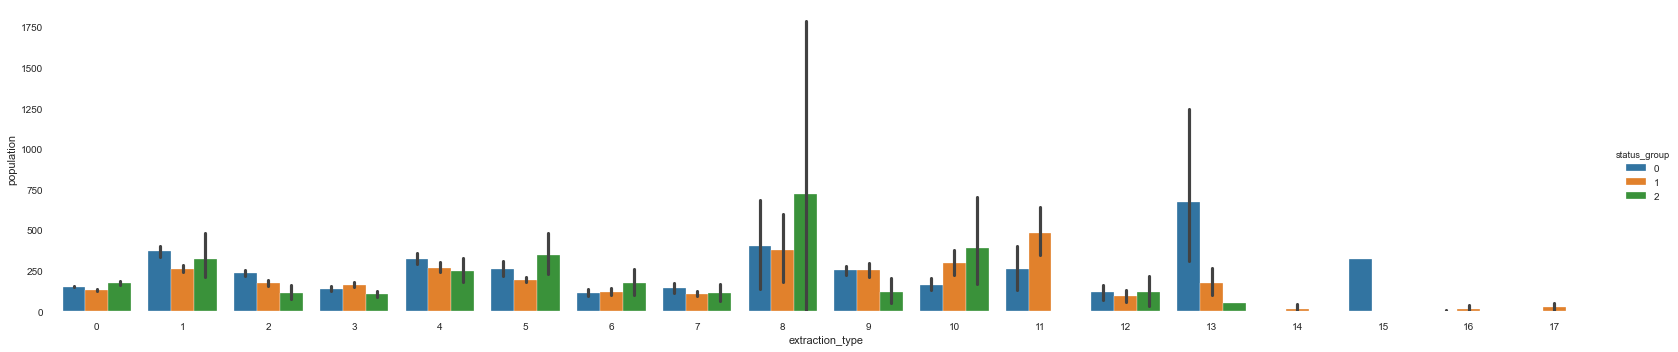

In [20]:
sns.catplot('extraction_type', 'population', hue='status_group', data= df, kind='bar', aspect=4.5 )

#### Add column named 'status_group_vals' to allow the use of a pivot table

In [21]:
vals_to_replace = {0:2, 2:1,
                   1:0}

df['status_group_vals']  = df.status_group.replace(vals_to_replace)

In [22]:
management_vs_status = pd.pivot_table(df, index=['management', 'status_group'], values='status_group_vals', aggfunc='count')

In [23]:
basin_vs_status = pd.pivot_table(df, index=['basin', 'status_group'], values='status_group_vals', aggfunc='count')

source_vs_status = pd.pivot_table(df, index=['source', 'status_group'], values='status_group_vals', aggfunc='count')

<a class="anchor" id="model"></a>
## Modeling the Data

#### It's time to train the algorithms in order to use the data to predict which wells will be faulty.

#### We split the data into predictor and target variables

In [24]:
X = df.drop(['status_group', 'status_group_vals'], axis=1)
y = df.status_group
y.value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

<a class="anchor" id="model1"></a>
#### We're going to start with the logistic regression model.

#### Logistic regression is used to model the probability of a certain class or event existing

In [27]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(class_weight='balanced', random_state=0, solver='saga', multi_class='ovr' )

#### Geometry is causing me issues, dropping it for now.

In [28]:
X_train.drop(['geometry'], axis=1, inplace=True)

In [29]:
X_test.drop(['geometry'], axis=1, inplace=True)

In [30]:
logR.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=0,
                   solver='saga')

In [31]:
predictions = logR.predict(X_test)

#### 0 - functional
#### 1- non-functional
#### 2 - functional but needs repair
#### Comparing a test label and a predicted label


In [33]:
df.iloc[1]

amount_tsh                                          0
funder                                              1
installer                                           1
longitude                                     34.6988
latitude                                     -2.14747
basin                                               1
region                                              1
population                                        280
construction_year                                2010
extraction_type                                     0
management                                          1
payment                                             1
water_quality                                       0
quantity                                            1
source                                              1
source_class                                        1
waterpoint_type                                     0
status_group                                        0
geometry               POINT

In [34]:
predictions[1]

0

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.47      0.54      6457
           1       0.46      0.62      0.53      4572
           2       0.16      0.15      0.15       851

    accuracy                           0.51     11880
   macro avg       0.41      0.41      0.41     11880
weighted avg       0.52      0.51      0.51     11880



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[3057 2929  471]
 [1532 2813  227]
 [ 347  374  130]]


In [37]:
logR.score(X_test, y_test)

0.5050505050505051

In [38]:
probs_y = logR.predict_proba(X_test)

#### Probability of all predicted values being labeled correctly

In [39]:
probs_y

array([[0.33588092, 0.33221797, 0.33190111],
       [0.34728422, 0.33530138, 0.31741441],
       [0.37397434, 0.32537941, 0.30064625],
       ...,
       [0.33311993, 0.33353412, 0.33334594],
       [0.36807303, 0.34585077, 0.28607619],
       [0.33456444, 0.34657952, 0.31885605]])

<a class="anchor" id="model2"></a>
## K-Nearest Neighbor

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=2, p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [41]:
test_preds = clf.predict(X_test)

In [42]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      6457
           1       0.77      0.59      0.67      4572
           2       0.54      0.17      0.26       851

    accuracy                           0.72     11880
   macro avg       0.67      0.55      0.57     11880
weighted avg       0.72      0.72      0.71     11880



In [43]:
print(confusion_matrix(y_test, test_preds))

[[5743  635   79]
 [1820 2706   46]
 [ 551  154  146]]


In [44]:
accuracy_score(y_test, test_preds)

0.7234848484848485

<a class="anchor" id="model3"></a>
## Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [46]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [3,5,7,20]}

In [47]:
gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20]})

In [48]:
from sklearn.metrics import accuracy_score
y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.7637205387205387

In [49]:
gs_inst.best_params_

{'criterion': 'gini', 'max_depth': 20}

In [50]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      6457
           1       0.78      0.75      0.77      4572
           2       0.39      0.33      0.36       851

    accuracy                           0.76     11880
   macro avg       0.65      0.64      0.64     11880
weighted avg       0.76      0.76      0.76     11880



In [51]:
print(confusion_matrix(y_test, y_pred_gs))

[[5356  809  292]
 [ 993 3439  140]
 [ 431  142  278]]


<a class="anchor" id="model4"></a>
## AdaBoost Classifier

#### Combines weak learners
#### Each weak learner learns from the previous
#### Learning rate - shrinks the contribution of each learner at each stage

In [52]:
from sklearn.ensemble import AdaBoostClassifier
param_dist = {'n_estimators': [50, 100],
             'learning_rate': [0.01,0.05,0.1,0.3,1]}


In [53]:
pre_gs_inst = RandomizedSearchCV(AdaBoostClassifier(),
                                param_distributions=param_dist,
                                cv=3,
                                n_iter= 10,
                                n_jobs=-1)

In [54]:
pre_gs_inst.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [50, 100]})

In [55]:
pre_gs_inst.best_params_

{'n_estimators': 100, 'learning_rate': 1}

#### Create new randomized search based on the last one

In [56]:
param_grid = {'n_estimators': [100],
             'learning_rate': [0.04,0.045,0.05,0.055,0.06]}

In [57]:
pre2_gs_inst = RandomizedSearchCV(AdaBoostClassifier(),
                                param_distributions=param_grid,
                                cv=3,
                                n_iter= 10,
                                n_jobs=-1)

In [58]:
pre2_gs_inst.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.04, 0.045, 0.05,
                                                          0.055, 0.06],
                                        'n_estimators': [100]})

In [59]:
pre2_gs_inst.best_params_

{'n_estimators': 100, 'learning_rate': 0.06}

In [60]:
y_pred_gs2 =pre2_gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs2)

0.6734848484848485

In [61]:
print(classification_report(y_test, y_pred_gs2))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76      6457
           1       0.73      0.48      0.58      4572
           2       0.00      0.00      0.00       851

    accuracy                           0.67     11880
   macro avg       0.46      0.46      0.45     11880
weighted avg       0.64      0.67      0.64     11880



In [62]:
print(confusion_matrix(y_test, y_pred_gs2))

[[5789  668    0]
 [2360 2212    0]
 [ 717  134    0]]


<a class="anchor" id="model5"></a>
## Stochastic Gradient Descent

#### Precision of non-functional went up by 4% when using huber loss function
#### Huber loss function - less sensitive to outliers
#### Quadratic for small values and linear for large values

In [63]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='huber')
sgd.fit(X_train,y_train)

SGDClassifier(loss='huber')

In [64]:
accuracy_score(y_test, sgd.predict(X_test))

0.3929292929292929

In [65]:
print(classification_report(y_test, sgd.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.14      0.22      6457
           1       0.39      0.81      0.52      4572
           2       0.07      0.05      0.06       851

    accuracy                           0.39     11880
   macro avg       0.33      0.33      0.27     11880
weighted avg       0.45      0.39      0.33     11880



In [66]:
print(confusion_matrix(y_test, sgd.predict(X_test)))

[[ 913 5172  372]
 [ 655 3712  205]
 [  99  709   43]]


<a class="anchor" id="model6"></a>
## Naive Bayes

In [67]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB().fit(X_train, y_train)

In [68]:
nb.classes_


array([0, 1, 2], dtype=int64)

#### Number of training samples in each class

In [69]:
nb.class_count_

array([25802., 18252.,  3466.])

In [70]:
accuracy_score(y_test, nb.predict(X_test))

0.5855218855218856

In [71]:
print(classification_report(y_test,  nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      6457
           1       0.53      0.57      0.55      4572
           2       0.20      0.03      0.06       851

    accuracy                           0.59     11880
   macro avg       0.46      0.42      0.42     11880
weighted avg       0.56      0.59      0.57     11880



In [72]:
print(confusion_matrix(y_test, nb.predict(X_test)))

[[4319 2068   70]
 [1919 2608   45]
 [ 577  245   29]]


<a class="anchor" id="model7"></a>
#### prepare models

LR: 0.564752 (0.017793)
KNN: 0.708418 (0.007538)
DTC: 0.753472 (0.003966)
ADA: 0.719444 (0.006000)
SGD: 0.514668 (0.071012)
NB: 0.586490 (0.008601)


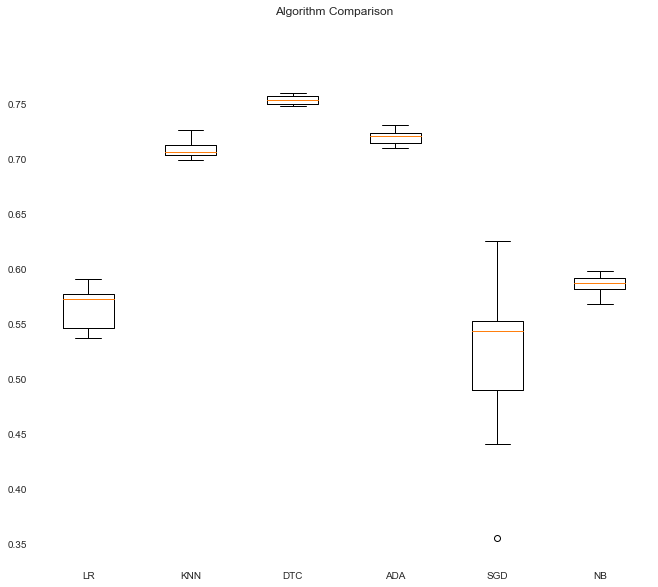

In [74]:
seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('NB', BernoulliNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(11, 9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<a class="anchor" id="interp"></a>
## Interpretation/Conclusion

#### We got the best results from decision tree classifier at 75% accuracy and the lowest standard deviation. Additionally it outperformed the other models even at it's least accurate prediction. K-nearest neighbor and AdaBoost both also had acceptable results at over 70% accuracy.

#### I believe that reintegrating the geometry feature into the models would improve the average accuracy.

#### Using this info you could better predict which wells are problematic and potentially dispatch inspection crews to verify with less logistical waste.